## 1- Kaggle profilime girip "kaggle.json" dosyasını indirdim.

In [1]:
from google.colab import files
files.upload()  # Bu, dosya yükleme ekranını açacaktır. Buradan 'kaggle.json' dosyasını seçin.


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"nurunnisakaplan","key":"77f98904551d03ee0378f420f320e470"}'}

## 2- İndirdiğim .json dosyasını çağırdım.

In [2]:
!pip install kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


## 3- Kaggle'da üzerinde çalıştığım veri setinin ilk yükleyicisinin sahibi bulup profilinden veri setini çektim.

In [3]:
!kaggle datasets download -d rm1000/brain-tumor-mri-scans


Dataset URL: https://www.kaggle.com/datasets/rm1000/brain-tumor-mri-scans
License(s): CC0-1.0
 96% 226M/236M [00:01<00:00, 160MB/s]
100% 236M/236M [00:01<00:00, 171MB/s]


## 4- Veri setini unzip yaptım. İçeriğini indirdim.

In [4]:
!unzip brain-tumor-mri-scans.zip -d ./brain_tumor_data


Görüntülenen çıkış son 5000 satıra kısaltıldı.
  inflating: ./brain_tumor_data/healthy/0402.jpg  
  inflating: ./brain_tumor_data/healthy/0403.jpg  
  inflating: ./brain_tumor_data/healthy/0404.jpg  
  inflating: ./brain_tumor_data/healthy/0405.jpg  
  inflating: ./brain_tumor_data/healthy/0406.jpg  
  inflating: ./brain_tumor_data/healthy/0407.jpg  
  inflating: ./brain_tumor_data/healthy/0408.jpg  
  inflating: ./brain_tumor_data/healthy/0409.jpg  
  inflating: ./brain_tumor_data/healthy/0410.jpg  
  inflating: ./brain_tumor_data/healthy/0411.jpg  
  inflating: ./brain_tumor_data/healthy/0412.jpg  
  inflating: ./brain_tumor_data/healthy/0413.jpg  
  inflating: ./brain_tumor_data/healthy/0414.jpg  
  inflating: ./brain_tumor_data/healthy/0415.jpg  
  inflating: ./brain_tumor_data/healthy/0416.jpg  
  inflating: ./brain_tumor_data/healthy/0417.jpg  
  inflating: ./brain_tumor_data/healthy/0418.jpg  
  inflating: ./brain_tumor_data/healthy/0419.jpg  
  inflating: ./brain_tumor_data/hea

## 5- Veri setinin içeriğini görüntüledim.


In [5]:
import os

data_dir = './brain_tumor_data'
print("Veri klasöründeki dosyalar:")
print(os.listdir(data_dir))


Veri klasöründeki dosyalar:
['glioma', 'healthy', 'meningioma', 'pituitary']


## Brain - Tumor Datasetini ve içinde bulunan klasörleri listeledim.
### İlk işimiz, veri setinin klasör yapısını anlamak. Bunun için Kaggle ortamında dizin içeriğini kontrol ediyoruz.

### (Dosya yoluna bakmam gerekti)

In [6]:
!ls /content


brain_tumor_data  brain-tumor-mri-scans.zip  kaggle.json  sample_data


In [7]:
import os

# Veri setinin ana dizini
dataset_path = "/content/brain_tumor_data"

# Ana klasör içeriğini listele
try:
    print("Ana klasör içeriği:")
    main_folders = os.listdir(dataset_path)
    print(main_folders)
except FileNotFoundError:
    print("Ana klasör bulunamadı. Lütfen dataset_path'i kontrol edin:", dataset_path)

# Training ve Testing klasörlerini kontrol edelim
for folder in main_folders:
    folder_path = os.path.join(dataset_path, folder)
    if os.path.isdir(folder_path):
        print(f"\n{folder} klasörü bulundu.")
        # Alt klasörleri de listele
        subfolders = os.listdir(folder_path)
        print(f"{folder} alt klasörleri: {subfolders}")
    else:
        print(f"\n{folder} bir klasör değil, dosya olabilir.")


Ana klasör içeriği:
['glioma', 'healthy', 'meningioma', 'pituitary']

glioma klasörü bulundu.
glioma alt klasörleri: ['0794.jpg', '0349.jpg', '1265.jpg', '1496.jpg', '0928.jpg', '0987.jpg', '1490.jpg', '0642.jpg', '0067.jpg', '0966.jpg', '0364.jpg', '0099.jpg', '0069.jpg', '0159.jpg', '0203.jpg', '0493.jpg', '1351.jpg', '0211.jpg', '1080.jpg', '1520.jpg', '1226.jpg', '1610.jpg', '0466.jpg', '0903.jpg', '0391.jpg', '0920.jpg', '0385.jpg', '0796.jpg', '0278.jpg', '0315.jpg', '1155.jpg', '1235.jpg', '0605.jpg', '1046.jpg', '0728.jpg', '1457.jpg', '1431.jpg', '1281.jpg', '1468.jpg', '0414.jpg', '1473.jpg', '1315.jpg', '0249.jpg', '1015.jpg', '0825.jpg', '1423.jpg', '0400.jpg', '0816.jpg', '0564.jpg', '1470.jpg', '0152.jpg', '1230.jpg', '0811.jpg', '0459.jpg', '0513.jpg', '1494.jpg', '0221.jpg', '0171.jpg', '0511.jpg', '0394.jpg', '1067.jpg', '1282.jpg', '1238.jpg', '0115.jpg', '1504.jpg', '0696.jpg', '0155.jpg', '1109.jpg', '0486.jpg', '1471.jpg', '0123.jpg', '0430.jpg', '1585.jpg', '0335.

## Dataset içinde her alt klasördeki görüntüleri listeledim ve işlemek üzere organize ettim.

In [8]:
import os

# Veri setinin ana dizini
dataset_path = "/content/brain_tumor_data"
main_folders = os.listdir(dataset_path)

# Görüntü yollarını saklamak için bir sözlük
image_paths = {}

# Alt klasörlerdeki görüntüleri listele (rekürsif olarak)
def get_images_from_folder(folder_path):
    image_files = []
    for root, dirs, files in os.walk(folder_path):  # os.walk, alt klasörleri de gezer
        for file in files:
            if file.endswith(('.jpg', '.png')):  # Görsel dosya türlerini kontrol et
                image_files.append(os.path.join(root, file))
    return image_files

# Klasörlerin altındaki görselleri ekleyelim
for folder in main_folders:
    folder_path = os.path.join(dataset_path, folder)
    image_paths[folder] = get_images_from_folder(folder_path)

# Her sınıf için kaç görüntü olduğunu yazdır
for label, paths in image_paths.items():
    print(f"{label} sınıfında {len(paths)} görüntü bulundu.")


glioma sınıfında 1621 görüntü bulundu.
healthy sınıfında 2000 görüntü bulundu.
meningioma sınıfında 1645 görüntü bulundu.
pituitary sınıfında 1757 görüntü bulundu.


# Görüntü İşleme Fonksiyonları
### Daha önce tanımladığım gibi, görüntü işleme için bir fonksiyon yazdım. Kontrast, keskinlik, parlaklık ve renk doygunluğu gibi işlemleri burada tanımladım.

In [9]:
from PIL import Image, ImageEnhance

def process_image(image, contrast_factor=1.5, sharpness_factor=2.0, brightness_factor=1.2, color_factor=1.3):
    # Kontrast artırma
    enhancer = ImageEnhance.Contrast(image)
    image = enhancer.enhance(contrast_factor)

    # Keskinlik artırma
    enhancer = ImageEnhance.Sharpness(image)
    image = enhancer.enhance(sharpness_factor)

    # Parlaklık artırma
    enhancer = ImageEnhance.Brightness(image)
    image = enhancer.enhance(brightness_factor)

    # Renk doygunluğu artırma
    enhancer = ImageEnhance.Color(image)
    image = enhancer.enhance(color_factor)

    return image


#  Görüntüleri İşleme ve Kaydetme
### Tüm sınıflardaki görüntüleri işleyip (Kontrast, keskinlik, parlaklık ve renk doygunluğu) "Processed_images" adlı yeni bir çıktı klasörüne kaydettim.

In [10]:
import os
from PIL import Image, ImageEnhance
# Çıktı klasörünün oluşturulması
output_dir = "/content/pre_processed_images"
os.makedirs(output_dir, exist_ok=True)

# Klasör isimleri ve dinamik olarak dosya yollarını almak
base_path = "/content/brain_tumor_data"
categories = ['pituitary', 'healthy', 'meningioma', 'glioma']

# Dinamik olarak dosya yollarını al
image_paths = {}

for category in categories:
    folder_path = os.path.join(base_path, category)
    # Sadece '.jpg' dosyalarını ekle
    image_paths[category] = [os.path.join(folder_path, file) for file in os.listdir(folder_path) if file.endswith('.jpg')]

# Görüntü işleme fonksiyonu (örnek)
def process_image(image, contrast_factor=1.5, sharpness_factor=2.0, brightness_factor=1.2, color_factor=1.3):

    # Kontrast artırma
    enhancer = ImageEnhance.Contrast(image)
    image = enhancer.enhance(contrast_factor)

    # Keskinlik artırma
    enhancer = ImageEnhance.Sharpness(image)
    image = enhancer.enhance(sharpness_factor)

    # Parlaklık artırma
    enhancer = ImageEnhance.Brightness(image)
    image = enhancer.enhance(brightness_factor)

    # Renk doygunluğu artırma
    enhancer = ImageEnhance.Color(image)
    image = enhancer.enhance(color_factor)

    return image

# Her sınıf için işlem yapılacak
for label, paths in image_paths.items():
    # Her sınıf için bir klasör oluşturuluyor
    label_output_dir = os.path.join(output_dir, label)
    os.makedirs(label_output_dir, exist_ok=True)

    for img_path in paths:
        try:
            # Görüntüyü yükle
            img = Image.open(img_path)

            # Görüntüyü işle
            processed_img = process_image(img)

            # İşlenmiş resmi kaydet
            save_path = os.path.join(label_output_dir, os.path.basename(img_path))
            processed_img.save(save_path)
        except Exception as e:
            # Eğer hata oluşursa, hata mesajı yazdırılır
            print(f"Resim işlenemedi: {img_path}. Hata: {e}")

print("Tüm görüntüler işlendi ve kaydedildi.")


Tüm görüntüler işlendi ve kaydedildi.


# İşlenmiş Görüntüleri Görüntüleme
### Bir sınıftan bir işlenmiş görüntüyü kontrol ettim.

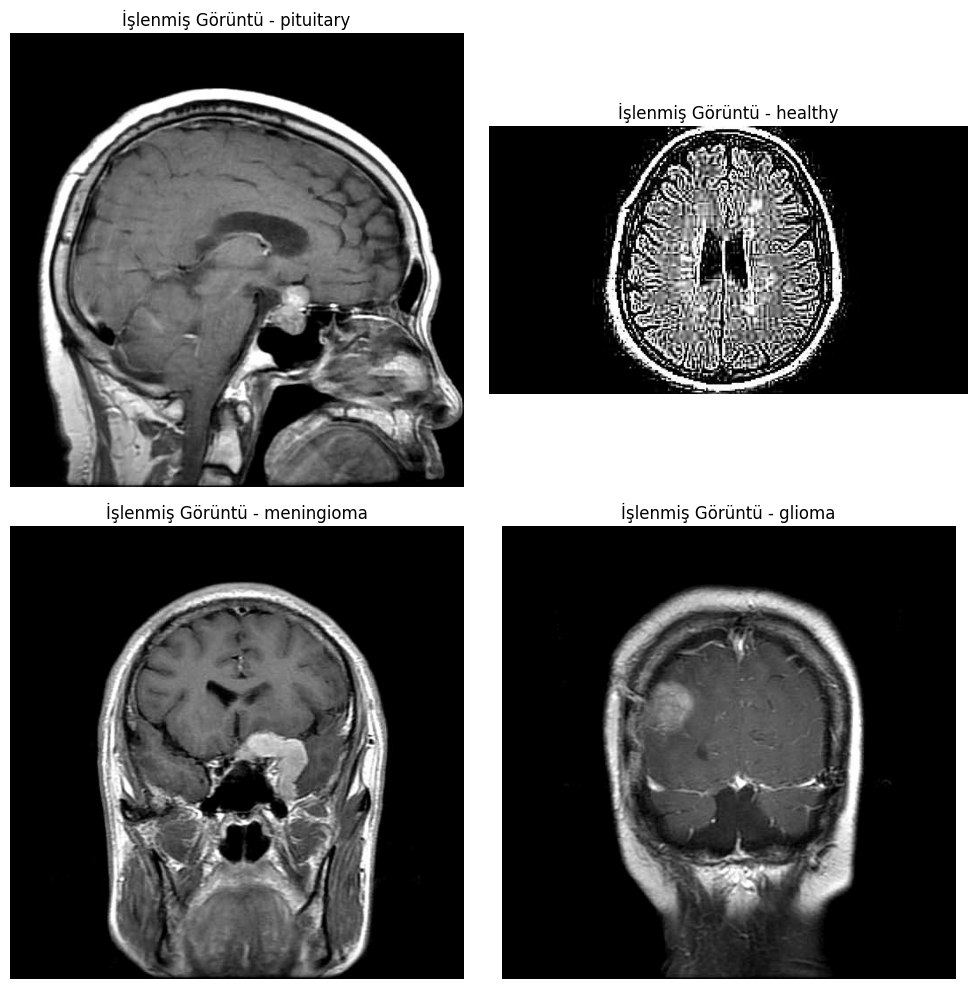

In [11]:
import matplotlib.pyplot as plt
import os
from PIL import Image

# Görsellerin bulunduğu çıktı dizini
output_dir = "/content/pre_processed_images"

# Kategoriler
categories = ['pituitary', 'healthy', 'meningioma', 'glioma']

# Grafik düzenini ayarlayalım
plt.figure(figsize=(10, 10))

# Her kategori için bir görseli göster
for i, category in enumerate(categories):
    # Kategorinin dosya yolunu al
    category_path = os.path.join(output_dir, category)

    # İlk dosyayı seç
    image_path = os.path.join(category_path, os.listdir(category_path)[0])
    image = Image.open(image_path)

    # Görseli subplot ile yerleştir
    plt.subplot(2, 2, i+1)
    plt.imshow(image)
    plt.axis("off")
    plt.title(f"İşlenmiş Görüntü - {category}")

# Görselleri göster
plt.tight_layout()
plt.show()


## Her kategori için orjinal ve işlenmiş görüntülerin gösterilmesi

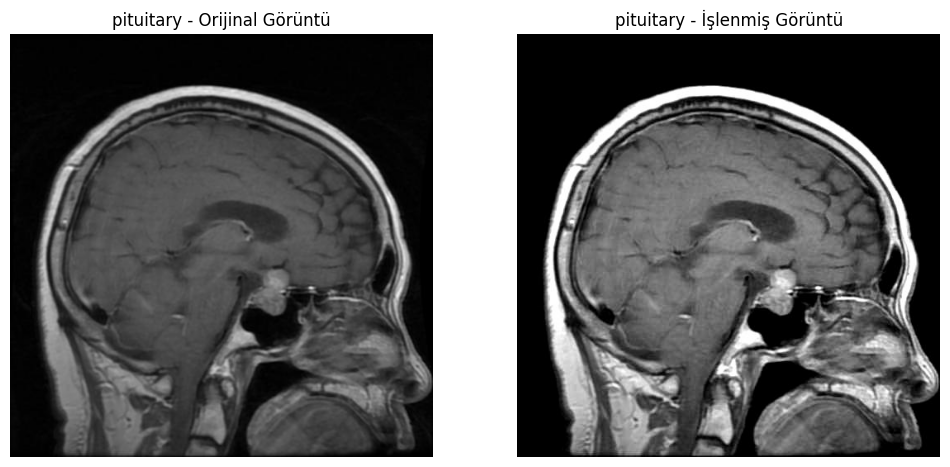

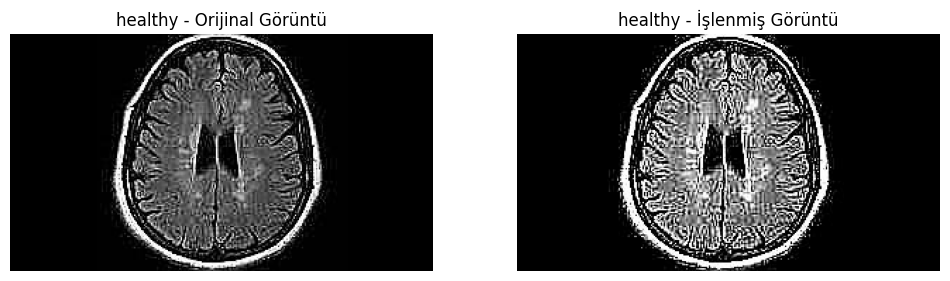

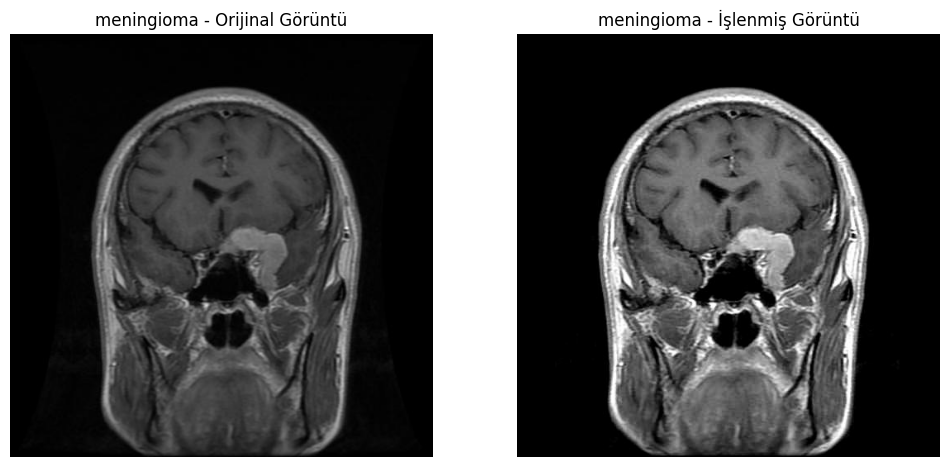

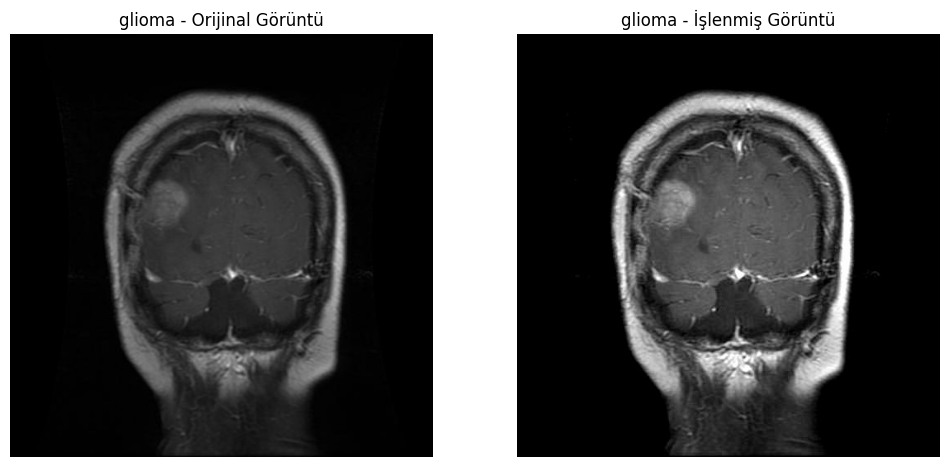

In [12]:
import os
import matplotlib.pyplot as plt
from PIL import Image

# Dataset ve işlenmiş görüntülerin bulunduğu dizinler
dataset_path = "/content/brain_tumor_data"
output_dir = "/content/pre_processed_images"

# Kategoriler
categories = ['pituitary', 'healthy', 'meningioma', 'glioma']

# Her kategori için orijinal ve işlenmiş görüntüleri göster
for category in categories:
    # Orijinal ve işlenmiş görüntü yollarını al
    example_original_path = os.path.join(dataset_path, category, os.listdir(os.path.join(dataset_path, category))[0])
    example_processed_path = os.path.join(output_dir, category, os.listdir(os.path.join(output_dir, category))[0])

    # Görüntüleri yükle
    original_image = Image.open(example_original_path)
    processed_image = Image.open(example_processed_path)

    # Görüntüleri yan yana göster
    plt.figure(figsize=(12, 6))

    # Orijinal görüntü
    plt.subplot(1, 2, 1)
    plt.imshow(original_image)
    plt.axis("off")
    plt.title(f"{category} - Orijinal Görüntü")

    # İşlenmiş görüntü
    plt.subplot(1, 2, 2)
    plt.imshow(processed_image)
    plt.axis("off")
    plt.title(f"{category} - İşlenmiş Görüntü")

    # Görselleri göster
    plt.show()


## Orjinal görüntü üzerinde Erozyon, Openning Closing ve Gradyan işlemlerinin yapıldığı kısım (hepsinin üst üste yapıldığı durum)

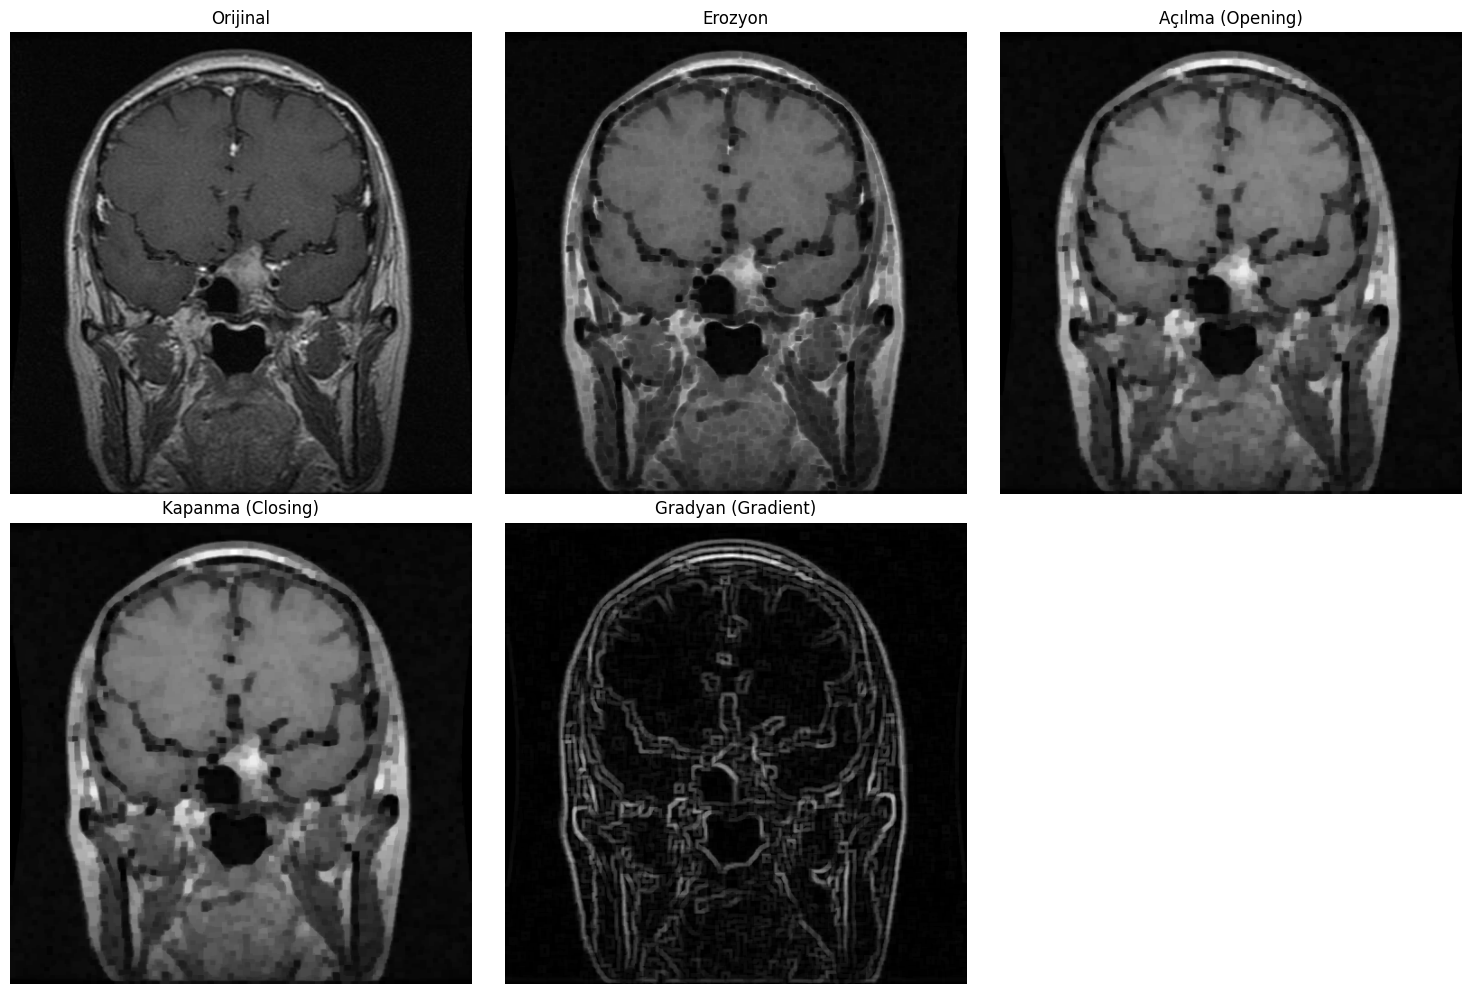

Görüntü işlendi ve görselleştirildi.


In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Tek bir görüntü seçiyoruz
image_path = "/content/brain_tumor_data/pituitary/0001.jpg"  # Örneğin pituitary kategorisinden bir görüntü
image = cv2.imread(image_path, 0)  # Görüntüyü gri tonlamalı olarak yükleyin

if image is None:
    print("Görüntü yüklenemedi! Lütfen dosya yolunu kontrol edin.")
else:
    # 1. Çekirdek tanımla (5x5 boyutunda)
    kernel = np.ones((5, 5), np.uint8)

    # 2. Erozyon işlemi
    eroded = cv2.erode(image, kernel, iterations=1)

    # 3. Erozyon işleminin ardından açılma (opening) işlemi
    opening = cv2.morphologyEx(eroded, cv2.MORPH_OPEN, kernel)

    # 4. Erozyon ve açılma işlemlerinin ardından kapanma (closing) işlemi
    closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel)

    # 5. Erozyon, açılma ve kapanma işlemleri sonrasında gradyan (gradient) işlemi
    gradient = cv2.morphologyEx(closing, cv2.MORPH_GRADIENT, kernel)

    # Görsellerin birleştirilmesi
    images = [image, eroded, opening, closing, gradient]
    titles = ['Orijinal', 'Erozyon', 'Açılma (Opening)', 'Kapanma (Closing)', 'Gradyan (Gradient)']

    # Görselleştirme işlemi
    plt.figure(figsize=(15, 10))
    for i in range(5):
        plt.subplot(2, 3, i + 1)
        plt.imshow(images[i], cmap='gray')
        plt.title(titles[i])
        plt.axis('off')

    plt.tight_layout()
    plt.show()

    print("Görüntü işlendi ve görselleştirildi.")


## Orjinal görüntü üzerinde Erozyon, Openning Closing ve Gradyan işlemlerinin yapıldığı kısım (ayrı ayrı yapıldığı kısım)

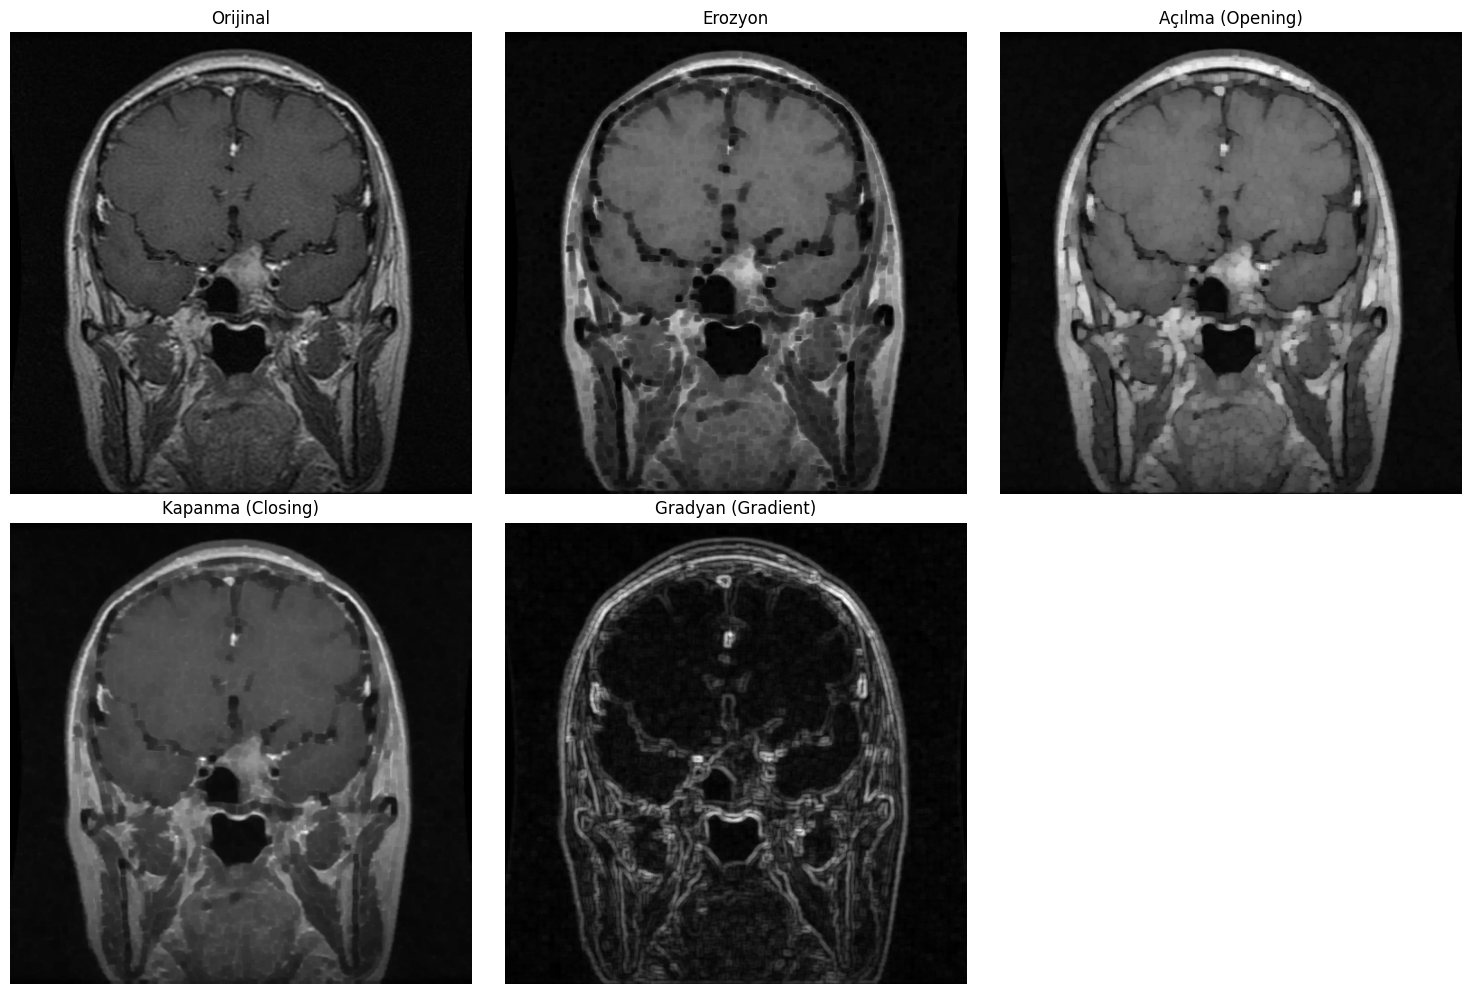

Görüntü işlendi ve görselleştirildi.


In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Tek bir görüntü seçiyoruz
image_path = "/content/brain_tumor_data/pituitary/0001.jpg"  # Örneğin pituitary kategorisinden bir görüntü
image = cv2.imread(image_path, 0)  # Görüntüyü gri tonlamalı olarak yükleyin

if image is None:
    print("Görüntü yüklenemedi! Lütfen dosya yolunu kontrol edin.")
else:
    # 1. Çekirdek tanımla (5x5 boyutunda)
    kernel = np.ones((5, 5), np.uint8)

    # 2. Erozyon işlemi
    eroded = cv2.erode(image, kernel, iterations=1)

    # 3. Erozyon işleminin ardından açılma (opening) işlemi
    opening = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

    # 4. Erozyon ve açılma işlemlerinin ardından kapanma (closing) işlemi
    closing = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)

    # 5. Erozyon, açılma ve kapanma işlemleri sonrasında gradyan (gradient) işlemi
    gradient = cv2.morphologyEx(image, cv2.MORPH_GRADIENT, kernel)

    # Görsellerin birleştirilmesi
    images = [image, eroded, opening, closing, gradient]
    titles = ['Orijinal', 'Erozyon', 'Açılma (Opening)', 'Kapanma (Closing)', 'Gradyan (Gradient)']

    # Görselleştirme işlemi
    plt.figure(figsize=(15, 10))
    for i in range(5):
        plt.subplot(2, 3, i + 1)
        plt.imshow(images[i], cmap='gray')
        plt.title(titles[i])
        plt.axis('off')

    plt.tight_layout()
    plt.show()

    print("Görüntü işlendi ve görselleştirildi.")


## Kontrast, keskinlik, parlaklık, renk doygunluğu ayarı yapıldıktan sonra aynı görüntü üzerinde önce erozyon sonra sırasıyla yine aynı görüntü üzerinde açılma, kapanma ve gradient uygulandı.

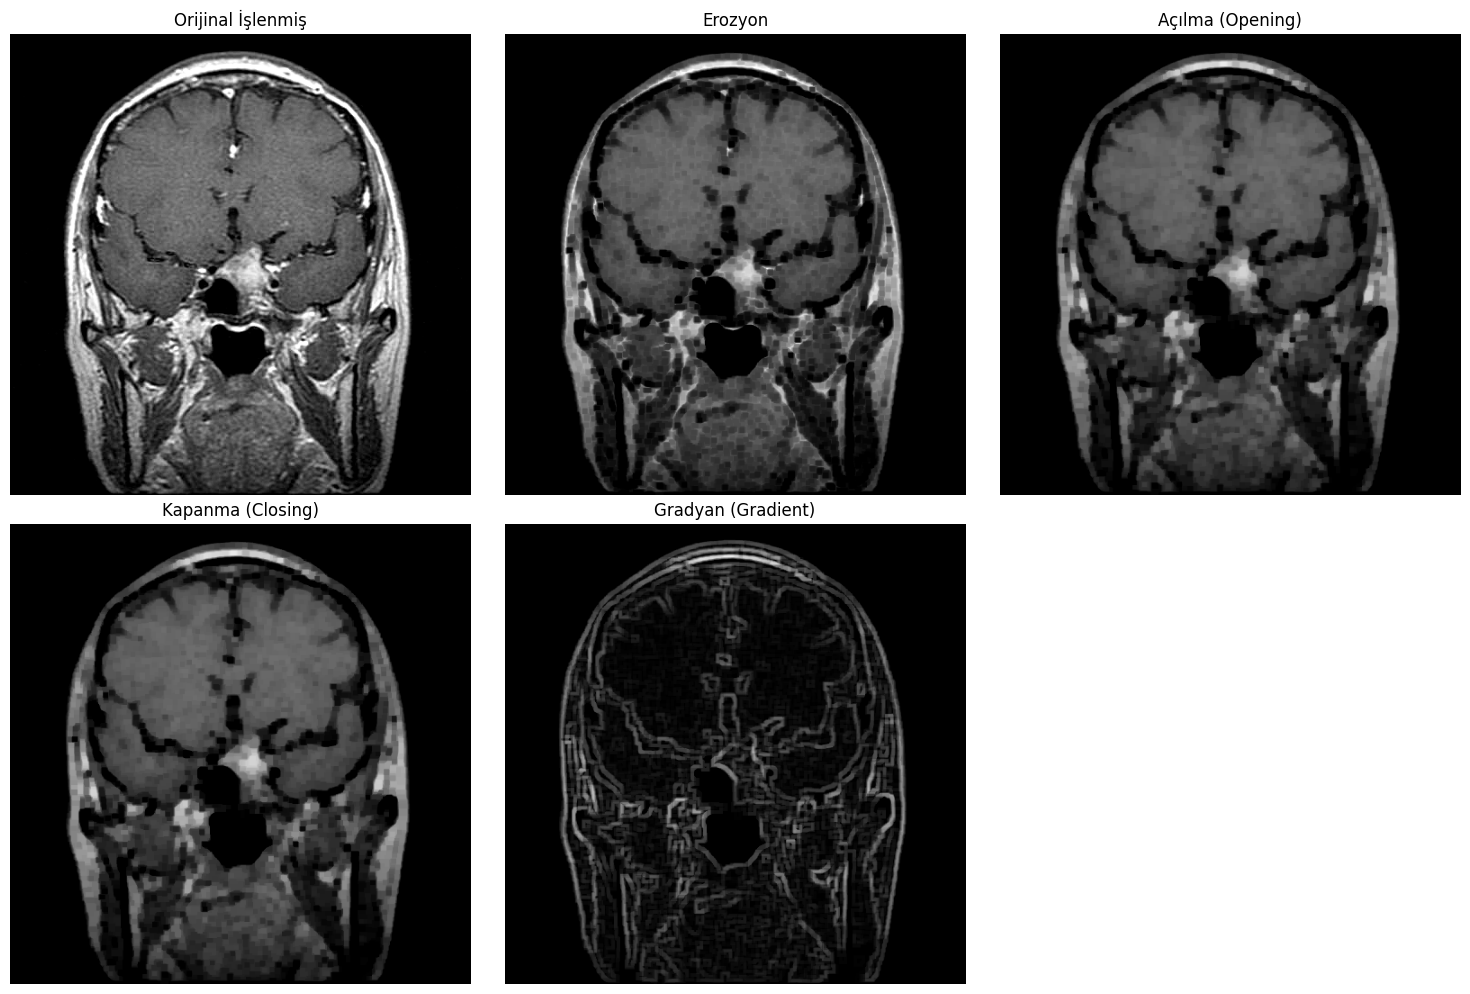

Görüntü işlemleri tamamlandı ve görselleştirildi.


In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageEnhance

# 1. Görüntüyü yükle
image_path = "/content/brain_tumor_data/pituitary/0001.jpg"  # Örneğin pituitary kategorisinden bir görüntü
image = Image.open(image_path)

# 2. Kontrast artırma
contrast_factor = 1.5
enhancer = ImageEnhance.Contrast(image)
image = enhancer.enhance(contrast_factor)

# 3. Keskinlik artırma
sharpness_factor = 2.0
enhancer = ImageEnhance.Sharpness(image)
image = enhancer.enhance(sharpness_factor)

# 4. Parlaklık artırma
brightness_factor = 1.2
enhancer = ImageEnhance.Brightness(image)
image = enhancer.enhance(brightness_factor)

# 5. Renk doygunluğunu artırma
color_factor = 1.3
enhancer = ImageEnhance.Color(image)
image = enhancer.enhance(color_factor)

# 6. Görüntüyü numpy array formatına çevir
image = np.array(image)

# 7. Erozyon işlemi
kernel = np.ones((5, 5), np.uint8)
eroded = cv2.erode(image, kernel, iterations=1)

# 8. Erozyon işleminin ardından açılma (opening) işlemi
opening = cv2.morphologyEx(eroded, cv2.MORPH_OPEN, kernel)

# 9. Erozyon ve açılma işlemlerinin ardından kapanma (closing) işlemi
closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel)

# 10. Erozyon, açılma ve kapanma işlemleri sonrasında gradyan (gradient) işlemi
gradient = cv2.morphologyEx(closing, cv2.MORPH_GRADIENT, kernel)

# 11. Görsellerin birleştirilmesi
images = [image, eroded, opening, closing, gradient]
titles = ['Orijinal İşlenmiş', 'Erozyon', 'Açılma (Opening)', 'Kapanma (Closing)', 'Gradyan (Gradient)']

# 12. Görselleştirme işlemi
plt.figure(figsize=(15, 10))
for i in range(5):
    plt.subplot(2, 3, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')

plt.tight_layout()
plt.show()

print("Görüntü işlemleri tamamlandı ve görselleştirildi.")


## Kontrast,keskinlik, parlaklık, renk doygunluğu yapıldıktan sonra işlenmiş görüntü üzerinde tek tek ve ayrı ayrı erosyon, açılma, kapanma, gradient ayarı yapıldı

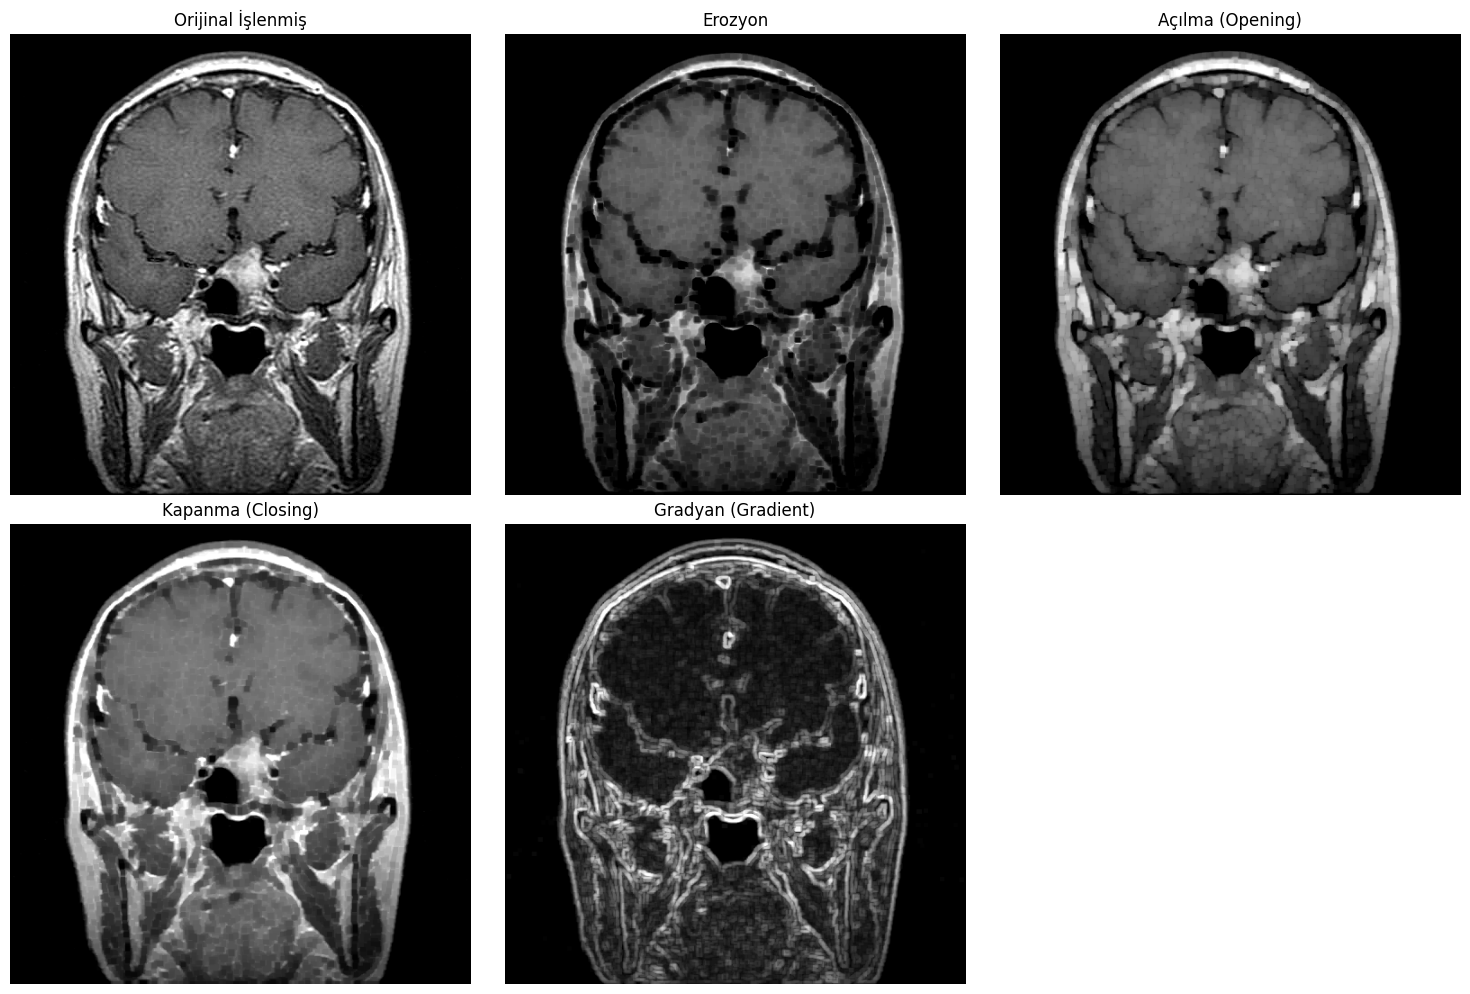

Görüntü işlemleri tamamlandı ve görselleştirildi.


In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageEnhance

# 1. Görüntüyü yükle
image_path = "/content/brain_tumor_data/pituitary/0001.jpg"  # Örneğin pituitary kategorisinden bir görüntü
image = Image.open(image_path)

# 2. Kontrast artırma
contrast_factor = 1.5
enhancer = ImageEnhance.Contrast(image)
image = enhancer.enhance(contrast_factor)

# 3. Keskinlik artırma
sharpness_factor = 2.0
enhancer = ImageEnhance.Sharpness(image)
image = enhancer.enhance(sharpness_factor)

# 4. Parlaklık artırma
brightness_factor = 1.2
enhancer = ImageEnhance.Brightness(image)
image = enhancer.enhance(brightness_factor)

# 5. Renk doygunluğunu artırma
color_factor = 1.3
enhancer = ImageEnhance.Color(image)
image = enhancer.enhance(color_factor)

# 6. Görüntüyü numpy array formatına çevir
image = np.array(image)

# 7. Erozyon işlemi
kernel = np.ones((5, 5), np.uint8)
eroded = cv2.erode(image, kernel, iterations=1)

# 8. Erozyon işleminin ardından açılma (opening) işlemi
opening = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

# 9. Erozyon ve açılma işlemlerinin ardından kapanma (closing) işlemi
closing = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)

# 10. Erozyon, açılma ve kapanma işlemleri sonrasında gradyan (gradient) işlemi
gradient = cv2.morphologyEx(image, cv2.MORPH_GRADIENT, kernel)

# 11. Görsellerin birleştirilmesi
images = [image, eroded, opening, closing, gradient]
titles = ['Orijinal İşlenmiş', 'Erozyon', 'Açılma (Opening)', 'Kapanma (Closing)', 'Gradyan (Gradient)']

# 12. Görselleştirme işlemi
plt.figure(figsize=(15, 10))
for i in range(5):
    plt.subplot(2, 3, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')

plt.tight_layout()
plt.show()

print("Görüntü işlemleri tamamlandı ve görselleştirildi.")


## Pre_Process edilmiş tüm görüntüler üzerinde "Erozyon, Opening, Closing ve Gradient" işlemleri uygulanıp ardından bu işlemlerin sonuçları işlem isimleri ile birlikte yeni bir "post_processed_images" klasörüne kaydediliyor.

In [17]:
import cv2
import numpy as np
import os

# Pre-processed görüntülerin bulunduğu klasör
input_dir = "/content/pre_processed_images"

# Kategoriler
categories = ['pituitary', 'healthy', 'meningioma', 'glioma']

# İşlenmiş görüntülerin kaydedileceği ana klasör
output_dir = "/content/post_processed_images"
os.makedirs(output_dir, exist_ok=True)

# Görüntüleri işleme
for category in categories:
    category_dir = os.path.join(input_dir, category)

    if os.path.exists(category_dir):
        # Her işlem için kategorinin alt klasörlerini oluştur
        erode_dir = os.path.join(output_dir, f"erode_{category}")
        opening_dir = os.path.join(output_dir, f"opening_{category}")
        closing_dir = os.path.join(output_dir, f"closing_{category}")
        gradient_dir = os.path.join(output_dir, f"gradient_{category}")

        os.makedirs(erode_dir, exist_ok=True)
        os.makedirs(opening_dir, exist_ok=True)
        os.makedirs(closing_dir, exist_ok=True)
        os.makedirs(gradient_dir, exist_ok=True)

        # Kategorideki her bir görüntü dosyasını işle
        for image_file in os.listdir(category_dir):
            if image_file.endswith(".jpg") or image_file.endswith(".png") or image_file.endswith(".jpeg"):
                image_path = os.path.join(category_dir, image_file)
                image = cv2.imread(image_path)

                # Erozyon işlemi
                kernel = np.ones((5, 5), np.uint8)
                eroded = cv2.erode(image, kernel, iterations=1)
                eroded_image_path = os.path.join(erode_dir, f"erode_{category}_{image_file}")
                cv2.imwrite(eroded_image_path, eroded)
                print(f"{image_file} erozyon işlemiyle kaydedildi.")

                # Erozyon işleminin ardından açılma (opening) işlemi
                opening = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)
                opening_image_path = os.path.join(opening_dir, f"opening_{category}_{image_file}")
                cv2.imwrite(opening_image_path, opening)
                print(f"{image_file} açılma işlemiyle kaydedildi.")

                # Erozyon ve açılma işlemlerinin ardından kapanma (closing) işlemi
                closing = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)
                closing_image_path = os.path.join(closing_dir, f"closing_{category}_{image_file}")
                cv2.imwrite(closing_image_path, closing)
                print(f"{image_file} kapanma işlemiyle kaydedildi.")

                # Erozyon, açılma ve kapanma işlemleri sonrasında gradyan (gradient) işlemi
                gradient = cv2.morphologyEx(image, cv2.MORPH_GRADIENT, kernel)
                gradient_image_path = os.path.join(gradient_dir, f"gradient_{category}_{image_file}")
                cv2.imwrite(gradient_image_path, gradient)
                print(f"{image_file} gradyan işlemiyle kaydedildi.")
    else:
        print(f"{category} kategorisi bulunamadı.")


Görüntülenen çıkış son 5000 satıra kısaltıldı.
0637.jpg erozyon işlemiyle kaydedildi.
0637.jpg açılma işlemiyle kaydedildi.
0637.jpg kapanma işlemiyle kaydedildi.
0637.jpg gradyan işlemiyle kaydedildi.
0245.jpg erozyon işlemiyle kaydedildi.
0245.jpg açılma işlemiyle kaydedildi.
0245.jpg kapanma işlemiyle kaydedildi.
0245.jpg gradyan işlemiyle kaydedildi.
0039.jpg erozyon işlemiyle kaydedildi.
0039.jpg açılma işlemiyle kaydedildi.
0039.jpg kapanma işlemiyle kaydedildi.
0039.jpg gradyan işlemiyle kaydedildi.
0572.jpg erozyon işlemiyle kaydedildi.
0572.jpg açılma işlemiyle kaydedildi.
0572.jpg kapanma işlemiyle kaydedildi.
0572.jpg gradyan işlemiyle kaydedildi.
0617.jpg erozyon işlemiyle kaydedildi.
0617.jpg açılma işlemiyle kaydedildi.
0617.jpg kapanma işlemiyle kaydedildi.
0617.jpg gradyan işlemiyle kaydedildi.
0337.jpg erozyon işlemiyle kaydedildi.
0337.jpg açılma işlemiyle kaydedildi.
0337.jpg kapanma işlemiyle kaydedildi.
0337.jpg gradyan işlemiyle kaydedildi.
0981.jpg erozyon işlemi

## Bütün dosyalarıma bakıyorum kayıt olmuşlar mı diye

In [18]:
!ls /content

brain_tumor_data	   kaggle.json		  pre_processed_images
brain-tumor-mri-scans.zip  post_processed_images  sample_data


## Bir görüntü çağrılarak "hem orjinal hali hemde  işlenmiş olan haline" R-G-B uygulanmıştır

In [19]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Orijinal görüntü ve işlenmiş görüntü yolları
original_image_path = "/content/brain_tumor_data/pituitary/0001.jpg"
processed_image_path = "/content/pre_processed_images/pituitary/0001.jpg"

# Görüntüleri gri tonlamalı olarak yükle
original_image_gray = cv2.imread(original_image_path, 0)  # Orijinal
processed_image_gray = cv2.imread(processed_image_path, 0)  # İşlenmiş

if original_image_gray is None or processed_image_gray is None:
    print("Görüntüler yüklenemedi! Lütfen dosya yollarını kontrol edin.")
else:
    # Renk simülasyonu fonksiyonu
    def apply_rgb_simulation(gray_image):
        red_image = cv2.merge([gray_image, np.zeros_like(gray_image), np.zeros_like(gray_image)])    # Kırmızı
        green_image = cv2.merge([np.zeros_like(gray_image), gray_image, np.zeros_like(gray_image)])  # Yeşil
        blue_image = cv2.merge([np.zeros_like(gray_image), np.zeros_like(gray_image), gray_image])   # Mavi
        return red_image, green_image, blue_image

    # Orijinal ve işlenmiş görüntüler için RGB simülasyonları
    original_red, original_green, original_blue = apply_rgb_simulation(original_image_gray)
    processed_red, processed_green, processed_blue = apply_rgb_simulation(processed_image_gray)

    # Görselleştirme
    plt.figure(figsize=(15, 10))

    # Orijinal görüntü simülasyonları
    plt.subplot(2, 3, 1)
    plt.imshow(original_red)
    plt.title('Orijinal - Kırmızı Simülasyonu')
    plt.axis('off')

    plt.subplot(2, 3, 2)
    plt.imshow(original_green)
    plt.title('Orijinal - Yeşil Simülasyonu')
    plt.axis('off')

    plt.subplot(2, 3, 3)
    plt.imshow(original_blue)
    plt.title('Orijinal - Mavi Simülasyonu')
    plt.axis('off')

    # İşlenmiş görüntü simülasyonları
    plt.subplot(2, 3, 4)
    plt.imshow(processed_red)
    plt.title('İşlenmiş - Kırmızı Simülasyonu')
    plt.axis('off')

    plt.subplot(2, 3, 5)
    plt.imshow(processed_green)
    plt.title('İşlenmiş - Yeşil Simülasyonu')
    plt.axis('off')

    plt.subplot(2, 3, 6)
    plt.imshow(processed_blue)
    plt.title('İşlenmiş - Mavi Simülasyonu')
    plt.axis('off')

    plt.tight_layout()
    plt.show()


## ROI Sobel ve Canny Kenar tespiti yapılan kısım

In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Görüntü dosya yolları
original_image_path = "/content/brain_tumor_data/pituitary/0001.jpg"
pre_processed_image_path = "/content/pre_processed_images/pituitary/0001.jpg"

# Orijinal görüntüyü gri tonlamalı olarak yükle
original_image_gray = cv2.imread(original_image_path, 0)
if original_image_gray is None:
    print("Orijinal görüntü yüklenemedi! Lütfen dosya yolunu kontrol edin.")

# Pre-processed görüntüyü gri tonlamalı olarak yükle
pre_processed_image_gray = cv2.imread(pre_processed_image_path, 0)
if pre_processed_image_gray is None:
    print("Pre-processed görüntü yüklenemedi! Lütfen dosya yolunu kontrol edin.")

# ROI (Region of Interest) belirle
roi_original = original_image_gray[0:500, 0:500]
roi_pre_processed = pre_processed_image_gray[0:500, 0:500]

# Orijinal görüntü üzerinde Sobel ve Canny işlemleri
sobelx_original = cv2.Sobel(roi_original, cv2.CV_64F, 1, 0, ksize=3)
sobely_original = cv2.Sobel(roi_original, cv2.CV_64F, 0, 1, ksize=3)
sobel_original = cv2.magnitude(sobelx_original, sobely_original)
canny_original = cv2.Canny(roi_original, 100, 200)

# Pre-processed görüntü üzerinde Sobel ve Canny işlemleri
sobelx_pre_processed = cv2.Sobel(roi_pre_processed, cv2.CV_64F, 1, 0, ksize=3)
sobely_pre_processed = cv2.Sobel(roi_pre_processed, cv2.CV_64F, 0, 1, ksize=3)
sobel_pre_processed = cv2.magnitude(sobelx_pre_processed, sobely_pre_processed)
canny_pre_processed = cv2.Canny(roi_pre_processed, 100, 200)

# Görselleri karşılaştırmalı görselleştirme
plt.figure(figsize=(15, 10))

# Orijinal görüntü sonuçları
plt.subplot(2, 4, 1)
plt.imshow(roi_original, cmap='gray')
plt.title('Orijinal ROI')
plt.axis('off')

plt.subplot(2, 4, 2)
plt.imshow(sobel_original, cmap='gray')
plt.title('Orijinal Sobel')
plt.axis('off')

plt.subplot(2, 4, 3)
plt.imshow(canny_original, cmap='gray')
plt.title('Orijinal Canny')
plt.axis('off')

# Pre-processed görüntü sonuçları
plt.subplot(2, 4, 5)
plt.imshow(roi_pre_processed, cmap='gray')
plt.title('Pre-processed ROI')
plt.axis('off')

plt.subplot(2, 4, 6)
plt.imshow(sobel_pre_processed, cmap='gray')
plt.title('Pre-processed Sobel')
plt.axis('off')

plt.subplot(2, 4, 7)
plt.imshow(canny_pre_processed, cmap='gray')
plt.title('Pre-processed Canny')
plt.axis('off')

plt.tight_layout()
plt.show()


## Orjinal görüntüler için ROI ve ardından sobel ve canny uygulandı ve her biri farklı dosya yapıları olarak kaydedildi

#####/ROI_sobel_canny_org/
#####   pituitary_ROI/
#####        ROI_0001.jpg
#####    pituitary_ROI_sobel/
#####       Sobel_0001.jpg
#####   pituitary_ROI_canny/
#####       Canny_0001.jpg
#####   glioma_ROI/
#####        ROI_0002.jpg
#####   glioma_ROI_sobel/
#####      Sobel_0002.jpg
#####    glioma_ROI_canny/
#####      Canny_0002.jpg


In [21]:
import cv2
import os
import numpy as np
from tqdm import tqdm  # İlerleme çubuğu için

# Giriş ve çıkış klasör yolları
original_folder = "/content/brain_tumor_data"  # Orijinal klasör yolu
output_folder = "/content/ROI_sobel_canny_org"  # Çıkış klasör yolu

# Çıkış klasörü yoksa oluştur
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Her kategori için işlem yap
categories = os.listdir(original_folder)  # Kategorileri al

for category in tqdm(categories, desc="Kategoriler işleniyor"):
    category_path = os.path.join(original_folder, category)

    # Kategori altındaki çıkış klasörlerini oluştur
    roi_folder = os.path.join(output_folder, f"{category}_ROI")
    sobel_folder = os.path.join(output_folder, f"{category}_ROI_sobel")
    canny_folder = os.path.join(output_folder, f"{category}_ROI_canny")

    os.makedirs(roi_folder, exist_ok=True)
    os.makedirs(sobel_folder, exist_ok=True)
    os.makedirs(canny_folder, exist_ok=True)

    # Her görüntü için işlem yap
    for img_file in os.listdir(category_path):
        img_path = os.path.join(category_path, img_file)
        img_gray = cv2.imread(img_path, 0)  # Gri tonlamalı olarak yükle

        if img_gray is None:
            print(f"Görüntü yüklenemedi: {img_path}")
            continue

        # ROI seçimi
        roi = img_gray[0:500, 0:500]  # ROI (0:500, 0:500)

        # Sobel işlemi
        sobelx = cv2.Sobel(roi, cv2.CV_64F, 1, 0, ksize=3)
        sobely = cv2.Sobel(roi, cv2.CV_64F, 0, 1, ksize=3)
        sobel = cv2.magnitude(sobelx, sobely)

        # Canny işlemi
        canny = cv2.Canny(roi, 100, 200)

        # Etiketli dosya isimleri
        roi_filename = f"ROI_{os.path.splitext(img_file)[0]}.jpg"
        sobel_filename = f"Sobel_{os.path.splitext(img_file)[0]}.jpg"
        canny_filename = f"Canny_{os.path.splitext(img_file)[0]}.jpg"

        # Çıkış dosya yolları
        roi_output_path = os.path.join(roi_folder, roi_filename)
        sobel_output_path = os.path.join(sobel_folder, sobel_filename)
        canny_output_path = os.path.join(canny_folder, canny_filename)

        # Görselleri kaydet
        cv2.imwrite(roi_output_path, roi)
        cv2.imwrite(sobel_output_path, sobel)
        cv2.imwrite(canny_output_path, canny)

print(f"Bütün görüntüler işlendi ve {output_folder} klasörüne kaydedildi.")


Kategoriler işleniyor: 100%|██████████| 4/4 [00:59<00:00, 14.90s/it]

Bütün görüntüler işlendi ve /content/ROI_sobel_canny_org klasörüne kaydedildi.


## Pre_processed görüntüler için ROI ve ardından sobel ve canny uygulandı ve her biri farklı dosya yapıları olarak kaydedildi

In [22]:
import cv2
import os
import numpy as np
from tqdm import tqdm  # İlerleme çubuğu için

# Giriş ve çıkış klasör yolları
pre_processed_folder = "/content/pre_processed_images"  # Pre-processed görüntülerin bulunduğu klasör
output_folder = "/content/ROI_sobel_canny_pre_processed"  # Çıkış klasörü

# Çıkış klasörü yoksa oluştur
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Her kategori için işlem yap
categories = os.listdir(pre_processed_folder)  # Kategorileri al

for category in tqdm(categories, desc="Kategoriler işleniyor"):
    category_path = os.path.join(pre_processed_folder, category)

    # Kategori altındaki çıkış klasörlerini oluştur
    roi_folder = os.path.join(output_folder, f"{category}_ROI")
    sobel_folder = os.path.join(output_folder, f"{category}_ROI_sobel")
    canny_folder = os.path.join(output_folder, f"{category}_ROI_canny")

    os.makedirs(roi_folder, exist_ok=True)
    os.makedirs(sobel_folder, exist_ok=True)
    os.makedirs(canny_folder, exist_ok=True)

    # Her görüntü için işlem yap
    for img_file in os.listdir(category_path):
        img_path = os.path.join(category_path, img_file)
        img_gray = cv2.imread(img_path, 0)  # Gri tonlamalı olarak yükle

        if img_gray is None:
            print(f"Görüntü yüklenemedi: {img_path}")
            continue

        # ROI seçimi
        roi = img_gray[0:500, 0:500]  # ROI (0:500, 0:500)

        # Sobel işlemi
        sobelx = cv2.Sobel(roi, cv2.CV_64F, 1, 0, ksize=3)
        sobely = cv2.Sobel(roi, cv2.CV_64F, 0, 1, ksize=3)
        sobel = cv2.magnitude(sobelx, sobely)

        # Canny işlemi
        canny = cv2.Canny(roi, 100, 200)

        # Etiketli dosya isimleri
        roi_filename = f"ROI_{os.path.splitext(img_file)[0]}.jpg"
        sobel_filename = f"Sobel_{os.path.splitext(img_file)[0]}.jpg"
        canny_filename = f"Canny_{os.path.splitext(img_file)[0]}.jpg"

        # Çıkış dosya yolları
        roi_output_path = os.path.join(roi_folder, roi_filename)
        sobel_output_path = os.path.join(sobel_folder, sobel_filename)
        canny_output_path = os.path.join(canny_folder, canny_filename)

        # Görselleri kaydet
        cv2.imwrite(roi_output_path, roi)
        cv2.imwrite(sobel_output_path, sobel)
        cv2.imwrite(canny_output_path, canny)

print(f"Bütün görüntüler işlendi ve {output_folder} klasörüne kaydedildi.")


Kategoriler işleniyor: 100%|██████████| 4/4 [01:02<00:00, 15.75s/it]

Bütün görüntüler işlendi ve /content/ROI_sobel_canny_pre_processed klasörüne kaydedildi.


In [23]:
!ls /content

brain_tumor_data	   post_processed_images  ROI_sobel_canny_pre_processed
brain-tumor-mri-scans.zip  pre_processed_images   sample_data
kaggle.json		   ROI_sobel_canny_org


## SEGMENTASYON
### 1-2-3-4-9-10-11 denendi



# #1 eşikleme yöntemleriyle bir görüntüyü binarize eder
#### cv2.THRESH_BINARY: Piksel değeri 127'den büyükse 255, küçükse 0 yapılır (beyaz/siyah).
#### cv2.THRESH_BINARY_INV: THRESH_BINARY işleminin tersine yapılır, yani 127'den küçük olanlar beyaz, büyük olanlar siyah olur.
#### cv2.THRESH_TRUNC: Piksel değeri 127'den büyükse 127'ye kesilir, küçükse olduğu gibi kalır.
#### cv2.THRESH_TOZERO: Piksel değeri 127'den küçükse 0 yapılır, büyükse olduğu gibi kalır.
#### cv2.THRESH_TOZERO_INV: THRESH_TOZERO'nun tersidir, 127'den küçük olanlar olduğu gibi kalır, büyük olanlar sıfırlanır.

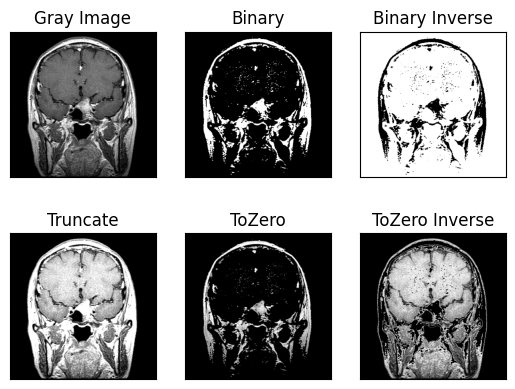

In [24]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# Görüntü dosya yolu (belirli bir görüntüyü seçin)
image_path = "/content/pre_processed_images/pituitary/0001.jpg"  # Örnek: pituitary klasöründen 0001.jpg

# Görüntüyü yükle
img = cv2.imread(image_path)

# Gri tonlamaya dönüştür
grayImage = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Eşikleme işlemleri
ret, thresh1 = cv2.threshold(grayImage, 127, 255, cv2.THRESH_BINARY)
ret, thresh2 = cv2.threshold(grayImage, 127, 255, cv2.THRESH_BINARY_INV)
ret, thresh3 = cv2.threshold(grayImage, 127, 255, cv2.THRESH_TRUNC)
ret, thresh4 = cv2.threshold(grayImage, 127, 255, cv2.THRESH_TOZERO)
ret, thresh5 = cv2.threshold(grayImage, 127, 255, cv2.THRESH_TOZERO_INV)

# Sonuçları göster
titles = ['Gray Image', 'Binary', 'Binary Inverse', 'Truncate', 'ToZero', 'ToZero Inverse']
images = [grayImage, thresh1, thresh2, thresh3, thresh4, thresh5]

for i in range(6):
   plt.subplot(2, 3, i+1), plt.imshow(images[i], 'gray')
   plt.title(titles[i])
   plt.xticks([]), plt.yticks([])

plt.show()

# #2
#### "Roberts operatörü", görüntüdeki kenarları bulmak için kullanılan bir filtre türüdür.
#### "Prewitt operatörü", kenar tespitinde kullanılan başka bir filtredir.
#### "Sobel operatörü", hem yatay hem de dikey kenarları bulmak için yaygın olarak kullanılan bir tekniktir.
#### "Laplace operatörü", görüntüdeki ikinci türev bilgisine dayanarak kenarları tespit eder.
#### "Scharr operatörü", Sobel operatörünün bir türevidir ve kenar tespitinde daha hassas sonuçlar verir.
#### "Canny kenar algılama algoritması", görüntüdeki kenarları yüksek doğrulukla tespit etmeye yönelik bir yöntemdir.
#### "LOG operatörü", önce Gaussian bulanıklığı uygulayıp, ardından Laplace operatörü ile kenarları çıkaran bir algoritmadır.

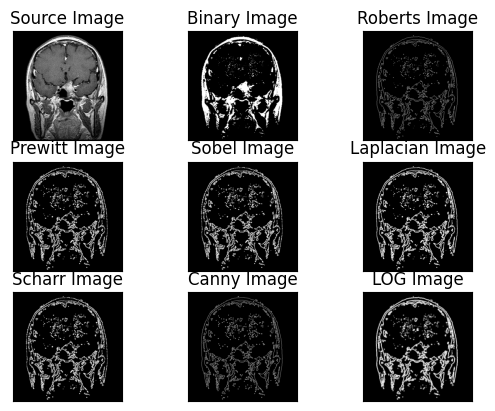

In [25]:
# -*- coding: utf-8 -*-
# 2021-05-17 Eastmount CSDN
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Görüntü dosya yolu (belirli bir görüntüyü seçin)
image_path = "/content/pre_processed_images/pituitary/0001.jpg"  # Örnek: pituitary klasöründen 0001.jpg

# Görüntüyü okuma
img = cv2.imread(image_path)
rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Görüntüyü gri tonlamaya dönüştürme
grayImage = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Eşikleme işlemi
ret, binary = cv2.threshold(grayImage, 127, 255, cv2.THRESH_BINARY)

# Roberts Operatörü
kernelx = np.array([[-1,0],[0,1]], dtype=int)
kernely = np.array([[0,-1],[1,0]], dtype=int)
x = cv2.filter2D(binary, cv2.CV_16S, kernelx)
y = cv2.filter2D(binary, cv2.CV_16S, kernely)
absX = cv2.convertScaleAbs(x)
absY = cv2.convertScaleAbs(y)
Roberts = cv2.addWeighted(absX, 0.5, absY, 0.5, 0)

# Prewitt Operatörü
kernelx = np.array([[1,1,1],[0,0,0],[-1,-1,-1]], dtype=int)
kernely = np.array([[-1,0,1],[-1,0,1],[-1,0,1]], dtype=int)
x = cv2.filter2D(binary, cv2.CV_16S, kernelx)
y = cv2.filter2D(binary, cv2.CV_16S, kernely)
absX = cv2.convertScaleAbs(x)
absY = cv2.convertScaleAbs(y)
Prewitt = cv2.addWeighted(absX,0.5,absY,0.5,0)

# Sobel Operatörü
x = cv2.Sobel(binary, cv2.CV_16S, 1, 0)
y = cv2.Sobel(binary, cv2.CV_16S, 0, 1)
absX = cv2.convertScaleAbs(x)
absY = cv2.convertScaleAbs(y)
Sobel = cv2.addWeighted(absX, 0.5, absY, 0.5, 0)

# Laplace Operatörü
dst = cv2.Laplacian(binary, cv2.CV_16S, ksize = 3)
Laplacian = cv2.convertScaleAbs(dst)

# Scharr Operatörü
x = cv2.Scharr(binary, cv2.CV_32F, 1, 0) # X yönü
y = cv2.Scharr(binary, cv2.CV_32F, 0, 1) # Y yönü
absX = cv2.convertScaleAbs(x)
absY = cv2.convertScaleAbs(y)
Scharr = cv2.addWeighted(absX, 0.5, absY, 0.5, 0)

# Canny Operatörü
gaussianBlur = cv2.GaussianBlur(binary, (3,3), 0) # Gaussian filtre
Canny = cv2.Canny(gaussianBlur , 50, 150)

# LOG Operatörü
gaussianBlur = cv2.GaussianBlur(binary, (3,3), 0) # Gaussian filtre
dst = cv2.Laplacian(gaussianBlur, cv2.CV_16S, ksize = 3)
LOG = cv2.convertScaleAbs(dst)

# Görüntülerin gösterilmesi
titles = ['Source Image', 'Binary Image', 'Roberts Image',
          'Prewitt Image', 'Sobel Image', 'Laplacian Image',
          'Scharr Image', 'Canny Image', 'LOG Image']
images = [rgb_img, binary, Roberts, Prewitt,
          Sobel, Laplacian, Scharr, Canny, LOG]
for i in np.arange(9):
   plt.subplot(3,3,i+1), plt.imshow(images[i], 'gray')
   plt.title(titles[i])
   plt.xticks([]), plt.yticks([])
plt.show()


# #3 Kontur uygulanması
#### - Otsu yöntemiyle eşikleme yapılır.
#### - Eşiklenmiş görüntü üzerinde kenar tespiti yapılır.
#### -Tespit edilen kenarlar orijinal görüntü üzerine çizilir.

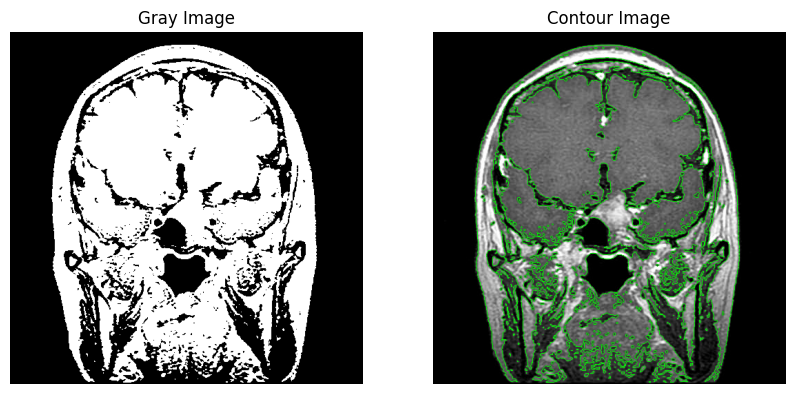

In [27]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Görüntü dosya yolu (belirli bir görüntüyü seçin)
image_path = "/content/pre_processed_images/pituitary/0001.jpg"  # Örnek: pituitary klasöründen 0001.jpg

# Görüntüyü okuma
img = cv2.imread(image_path)
rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Gri tonlamaya dönüştürme
grayImage = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Eşikleme işlemi (Otsu yöntemi ile)
ret, binary = cv2.threshold(grayImage, 0, 255,
                            cv2.THRESH_BINARY + cv2.THRESH_OTSU)  # Otsu yöntemi ile otomatik eşik

# Kenar tespiti (Konturlar)
contours, hierarchy = cv2.findContours(binary, cv2.RETR_TREE,
                                              cv2.CHAIN_APPROX_SIMPLE)  # Kontur tespiti

# Konturları çizme
cv2.drawContours(img, contours, -1, (0, 255, 0), 1)  # Konturları orijinal görüntüye çiz

# Görüntülerin matplotlib ile gösterimi
plt.figure(figsize=(10, 5))

# Gri tonlamalı eşiklenmiş görüntü
plt.subplot(1, 2, 1)
plt.imshow(binary, cmap='gray')
plt.title('Gray Image')
plt.axis('off')

# Konturlar çizilmiş orijinal görüntü
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))  # Renkli görüntü
plt.title('Contour Image')
plt.axis('off')

plt.show()


# #4 GrabCut Segmentasyonu

#### GrabCut Segmentasyonu: Görüntü üzerinde grabCut segmentasyon işlemi yapılıyor. rect koordinatları, segmentasyon için kullanılacak dikdörtgeni belirler.
#### Maske Uygulaması: GrabCut algoritmasının sonuçlarına göre yeni bir maske oluşturuluyor ve sadece ön plan kısmı gösteriliyor.

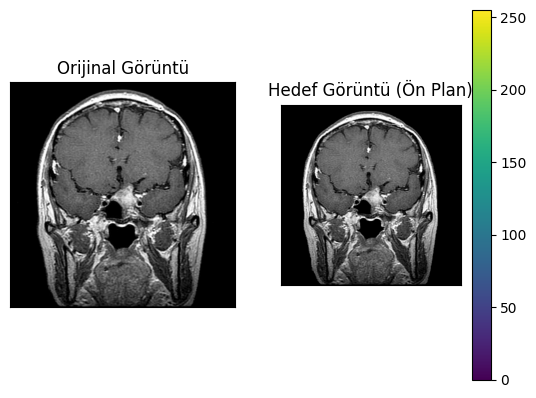

In [46]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Görüntü dosya yolu (belirli bir görüntüyü seçin)
image_path = "/content/pre_processed_images/pituitary/0001.jpg"  # Örnek: pituitary klasöründen 0001.jpg

# Görüntüyü okuma
img = cv2.imread(image_path)

# Gri tonlamaya dönüştürme
grayImage = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Maske, bgModel ve fgModel ayarları
mask = np.zeros(img.shape[:2], np.uint8)
bgdModel = np.zeros((1,65), np.float64)
fgdModel = np.zeros((1,65), np.float64)

# Dikdörtgen koordinatları
rect = (20, 20, 500, 800)

# Görüntü segmentasyonu (GrabCut algoritması)
cv2.grabCut(img, mask, rect, bgdModel, fgdModel, 5, cv2.GC_INIT_WITH_RECT)

# Yeni maskeyi ayarlama: 0 ve 2 arka plan olarak kabul edilir
mask2 = np.where((mask==2)|(mask==0), 0, 1).astype('uint8')

# Orijinal görüntü
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.title('Orijinal Görüntü')
plt.xticks([]), plt.yticks([])

# Maskeyi kullanarak ön planı almak
img_result = img_rgb * mask2[:, :, np.newaxis]
plt.subplot(1, 2, 2)
plt.imshow(img_result)
plt.title('Hedef Görüntü (Ön Plan)')
plt.colorbar()
plt.xticks([]), plt.yticks([])

# Görselleri göster
plt.show()


# #9 Otsu yöntemiyle eşikleme yaparak görüntüyü binary (ikili) hale getirir. Son olarak, orijinal ve eşiklenmiş görüntüleri ekranda gösterir.

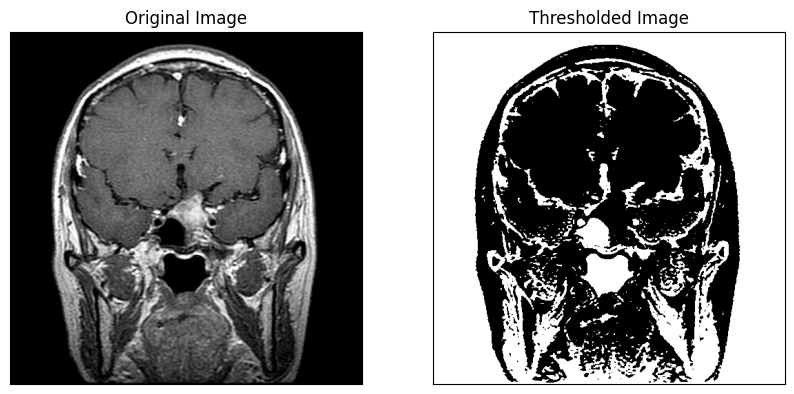

In [50]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

# Görüntü dosya yolu (belirli bir görüntüyü seçin)
image_path = "/content/pre_processed_images/pituitary/0001.jpg"  # Örnek: pituitary klasöründen 0001.jpg

# Görüntü okuma
img = cv2.imread(image_path)

# Görüntü gri tonlamaya dönüştürme
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Görüntü threshold (eşik değeri) uygulama
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Görüntüleri matplotlib ile gösterme
plt.figure(figsize=(10, 5))

# Orijinal görüntü
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))  # BGR'den RGB'ye dönüştürme
plt.title('Original Image')
plt.xticks([]), plt.yticks([])

# Threshold uygulandıktan sonraki görüntü
plt.subplot(1, 2, 2)
plt.imshow(thresh, cmap='gray')
plt.title('Thresholded Image')
plt.xticks([]), plt.yticks([])

plt.show()


# #10 Etiketleme ve Watershed Algoritması:
#### cv2.connectedComponents() fonksiyonu ile etiketleme yapılır ve cv2.watershed() fonksiyonu ile segmentasyon gerçekleştirilir.

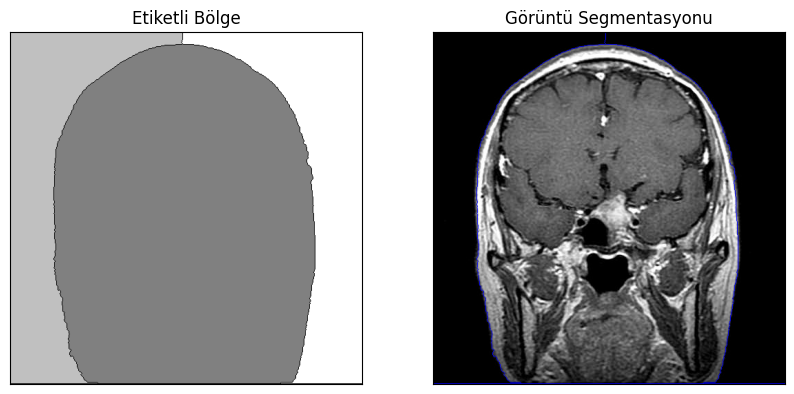

In [51]:
# coding: utf-8
import numpy as np
import cv2
from matplotlib import pyplot as plt

# Görüntü dosya yolu (belirli bir görüntüyü seçin)
image_path = "/content/pre_processed_images/pituitary/0001.jpg"  # Örnek: pituitary klasöründen 0001.jpg

# Görüntü okuma
img = cv2.imread(image_path)

# Görüntü gri tonlamaya dönüştürme
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Görüntü threshold (eşik değeri) uygulama
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Görüntüde gürültüyü ortadan kaldırmak için açma işlemi (opening)
kernel = np.ones((3, 3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)

# Arka plan bölgesini belirlemek için genişletme (dilation) işlemi
sure_bg = cv2.dilate(opening, kernel, iterations=3)

# Ön plan bölgesini belirlemek için mesafe dönüşümü (distance transform)
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
ret, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)

# Bilinmeyen alanları belirleme
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)

# Bağlantılı bileşenler ile etiketleme işlemi
ret, markers = cv2.connectedComponents(sure_fg)

# Tüm etiketleri 1 artırarak arka planın 0 değil 1 olmasını sağlamak
markers = markers + 1

# Bilinmeyen bölgeleri 0 ile etiketleme
markers[unknown == 255] = 0

# Watershed algoritması ile görüntü segmentasyonu
markers = cv2.watershed(img, markers)
img[markers == -1] = [255, 0, 0]  # Sınırları kırmızı renkte gösterme

# Görüntüleri matplotlib ile gösterme
plt.figure(figsize=(10, 5))

# Etiketli bölgeyi gösterme
plt.subplot(1, 2, 1)
plt.imshow(markers, cmap='gray')
plt.title('Etiketli Bölge')
plt.xticks([]), plt.yticks([])

# Segmentasyonu (bölümlendirilmiş görüntüyü) gösterme
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))  # BGR'den RGB'ye dönüştürme
plt.title('Görüntü Segmentasyonu')
plt.xticks([]), plt.yticks([])

plt.show()


# #11  flood fill
#### Bu kodun amacı, belirli bir noktadan (seed point) başlayarak flood fill algoritması ile bir bölgede renk değişikliği yapmaktır. Flood fill, genellikle bölgesel segmentasyon ve bölge analizi gibi işlemler için kullanılır. Burada kullanılan seed point (30, 30), algoritmanın başlangıç noktasını belirler ve bu noktadan itibaren renk değişikliği işlemi yapılır. Bu işlem, genellikle bölgesel değişiklikleri veya segmentasyon işlemleri için kullanılır.

In [62]:
# coding:utf-8
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Image file path (choose a specific image)
image_path = "/content/pre_processed_images/pituitary/0001.jpg"  # Example: pituitary folder 0001.jpg

# Read the original image
img = cv2.imread(image_path)

# Get the number of rows and columns in the image
rows, cols = img.shape[:2]

# Create the destination image
dst = img.copy()

# Create a mask. The mask must be a uint8 single-channel array with the number of rows and columns increased by 2.
# The extra 2 rows and columns ensure that the boundary pixels are processed.
mask = np.zeros([rows + 2, cols + 2], np.uint8)

# Apply flood fill processing
# Seed point at (30, 30) and color set to (0, 255, 255), connectivity range defined by loDiff and upDiff
# The range of pixel values for flood fill is: src(seed.x, seed.y) - loDiff <= src(x, y) <= src(seed.x, seed.y) + upDiff
cv2.floodFill(dst, mask, (30, 30), (0, 255, 255), (100, 100, 100), (50, 50, 50), cv2.FLOODFILL_FIXED_RANGE)

# Display the original and result images using Matplotlib (to work in Google Colab)
plt.figure(figsize=(10, 5))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

# Flood fill result
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
plt.title('Flood Fill Image')
plt.axis('off')

plt.show()
